## Part 1: Hypothesis Testing and Statistical Analysis


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_1samp, ttest_ind
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('financial_health_analysis_dataset.csv')


In [3]:
# Data preprocessing
df_clean = df.copy()
df_clean['Date'] = pd.to_datetime(df_clean['Date'])

# Calculate monthly aggregates for hypothesis testing
df_clean['Year'] = df_clean['Date'].dt.year
df_clean['Month'] = df_clean['Date'].dt.month
df_clean['YearMonth'] = df_clean['Date'].dt.to_period('M')

monthly_data = df_clean.groupby('YearMonth').agg({
    'Revenue': 'mean',
    'Expenses': 'mean', 
    'Profit': 'mean',
    'Cash Flow': 'mean',
    'Debt': 'mean',
    'Assets': 'mean',
    'Liabilities': 'mean'
}).reset_index()

print(f"Monthly data created with {len(monthly_data)} records")
monthly_data.head()


Monthly data created with 658 records


,YearMonth,Revenue,Expenses,Profit,Cash Flow,Debt,Assets,Liabilities
0,2000-01,62295.096774,48049.387097,14245.709677,15059.387097,30203.161290,105996.709677,45572.258065
1,2000-02,63339.172414,46498.275862,16840.896552,16757.206897,26718.931034,99447.379310,41439.206897
2,2000-03,56245.741935,46414.774194,9830.967742,9653.000000,27183.451613,95688.967742,44680.258065
3,2000-04,54036.833333,44303.033333,9733.800000,10211.100000,33915.233333,98886.133333,44411.666667
4,2000-05,59185.580645,44539.516129,14646.064516,14764.032258,28229.774194,100478.612903,38267.516129


## a: Hypothesis Testing


In [4]:
# Scenario 1: Test if average monthly profit > $10,000
print("HYPOTHESIS TEST 1: Average Monthly Profit")
print("H0: Average monthly profit <= $10,000")
print("H1: Average monthly profit > $10,000")
print("Alpha = 0.05")

benchmark_profit = 10000
monthly_profits = monthly_data['Profit']

# Perform one-sample t-test (one-tailed)
t_stat, p_value = ttest_1samp(monthly_profits, benchmark_profit)

# For one-tailed test (greater than), divide p-value by 2
p_value_one_tail = p_value / 2 if t_stat > 0 else 1 - (p_value / 2)

print(f"\nSample mean: ${monthly_profits.mean():,.2f}")
print(f"Sample size: {len(monthly_profits)}")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value (one-tailed): {p_value_one_tail:.4f}")

# Interpretation
if p_value_one_tail < 0.05:
    print(f"\nResult: Reject H0 (p-value < 0.05)")
    print(f"Conclusion: Average monthly profit is significantly greater than $10,000")
else:
    print(f"\nResult: Fail to reject H0 (p-value >= 0.05)")
    print(f"Conclusion: No sufficient evidence that average monthly profit > $10,000")


HYPOTHESIS TEST 1: Average Monthly Profit
H0: Average monthly profit <= $10,000
H1: Average monthly profit > $10,000
Alpha = 0.05

Sample mean: $12,259.17
Sample size: 658
T-statistic: 10.9337
P-value (one-tailed): 0.0000

Result: Reject H0 (p-value < 0.05)
Conclusion: Average monthly profit is significantly greater than $10,000


In [7]:
# Scenario 2: Test if average revenue and expenses are significantly different
from scipy.stats import ttest_rel

print("HYPOTHESIS TEST 2: Revenue vs Expenses")
print("H0: Average monthly revenue = Average monthly expenses")
print("H1: Average monthly revenue ≠ Average monthly expenses")
print("Alpha = 0.05")

monthly_revenue = monthly_data['Revenue']
monthly_expenses = monthly_data['Expenses']

# Perform paired t-test (since they're from same time periods)
t_stat2, p_value2 = ttest_rel(monthly_revenue, monthly_expenses)

print(f"\nRevenue mean: ${monthly_revenue.mean():,.2f}")
print(f"Expenses mean: ${monthly_expenses.mean():,.2f}")
print(f"Difference: ${(monthly_revenue.mean() - monthly_expenses.mean()):,.2f}")
print(f"T-statistic: {t_stat2:.4f}")
print(f"P-value (two-tailed): {p_value2:.4f}")

# Interpretation
if p_value2 < 0.05:
    print(f"\nResult: Reject H0 (p-value < 0.05)")
    print(f"Conclusion: Revenue and expenses are significantly different")
else:
    print(f"\nResult: Fail to reject H0 (p-value >= 0.05)")
    print(f"Conclusion: No significant difference between revenue and expenses")


HYPOTHESIS TEST 2: Revenue vs Expenses
H0: Average monthly revenue = Average monthly expenses
H1: Average monthly revenue ≠ Average monthly expenses
Alpha = 0.05

Revenue mean: $59,501.53
Expenses mean: $47,242.36
Difference: $12,259.17
T-statistic: 59.3305
P-value (two-tailed): 0.0000

Result: Reject H0 (p-value < 0.05)
Conclusion: Revenue and expenses are significantly different


## b: P-value Interpretation



Test 1 - Profit vs Benchmark:
P-value: 0.0000
Interpretation: Very strong evidence against H0 (p < 0.01)

Test 2 - Revenue vs Expenses:
P-value: 0.0000
Interpretation: Very strong evidence that revenue not equal to expenses (p < 0.01)

What p-values mean:
- p < 0.01: Very strong evidence against null hypothesis
- p < 0.05: Strong evidence against null hypothesis (commonly used threshold)
- p < 0.10: Weak evidence against null hypothesis
- p >= 0.10: No evidence against null hypothesis

## c: Trend Analysis


In [ ]:
yearly_data = df_clean.groupby('Year').agg({
    'Revenue': 'mean',
    'Profit': 'mean',
    'Assets': 'mean',
    'Debt': 'mean'
}).reset_index()

print("YEAR-OVER-YEAR ANALYSIS")
print(yearly_data)

# Calculate growth rates
yearly_data['Revenue_Growth'] = yearly_data['Revenue'].pct_change() * 100
yearly_data['Profit_Growth'] = yearly_data['Profit'].pct_change() * 100

print(f"\nGROWTH RATES")
for index, row in yearly_data.iterrows():
    if index > 0:  # Skip first year (no previous year to compare)
        print(f"Year {int(row['Year'])}:")
        print(f"  Revenue Growth: {row['Revenue_Growth']:.2f}%")
        print(f"  Profit Growth: {row['Profit_Growth']:.2f}%")


YEAR-OVER-YEAR ANALYSIS
    Year       Revenue        Profit         Assets          Debt
0   2000  60048.174863  12524.062842   97990.857923  30177.606557
1   2001  57798.323288  10974.947945   99239.923288  29556.978082
2   2002  59368.452055  12714.117808  100142.709589  30242.443836
3   2003  60254.967123  13405.123288  101477.298630  29931.090411
4   2004  60389.204918  13264.218579   99925.213115  30238.254098
5   2005  61110.082192  12598.734247   97830.928767  31045.394521
6   2006  57044.109589  10163.906849   97878.994521  29496.520548
7   2007  61496.268493  15071.065753   98379.649315  29226.624658
8   2008  59693.437158  11875.325137  100251.270492  29637.494536
9   2009  58387.424658  10877.468493   99263.202740  30123.054795
10  2010  58704.638356  11752.468493  100227.819178  29529.350685
11  2011  61103.019178  12446.197260   99143.095890  30237.794521
12  2012  60380.754098  13342.857923  100861.948087  29819.038251
13  2013  58572.334247  13073.265753  100896.931507 

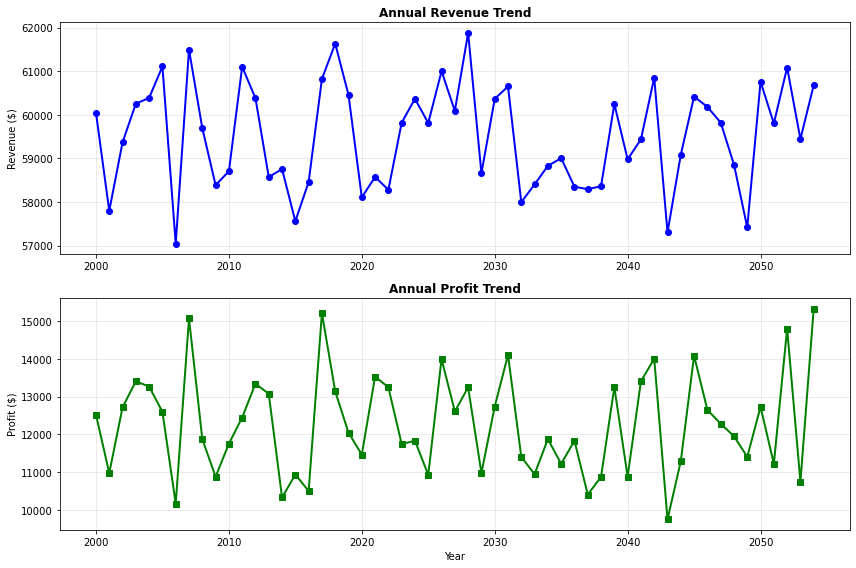

PERIODS OF SIGNIFICANT CHANGE (>20%)
Year 2007: Significant profit change (48.3%)
Year 2008: Significant profit change (-21.2%)
Year 2014: Significant profit change (-21.0%)
Year 2017: Significant profit change (44.8%)
Year 2026: Significant profit change (28.1%)
Year 2039: Significant profit change (21.9%)
Year 2041: Significant profit change (23.2%)
Year 2043: Significant profit change (-30.4%)
Year 2045: Significant profit change (24.8%)
Year 2052: Significant profit change (31.9%)
Year 2053: Significant profit change (-27.4%)
Year 2054: Significant profit change (42.7%)


In [ ]:
plt.figure(figsize=(12, 8))

# Revenue trend
plt.subplot(2, 1, 1)
plt.plot(yearly_data['Year'], yearly_data['Revenue'], marker='o', linewidth=2, color='blue')
plt.title('Annual Revenue Trend', fontweight='bold')
plt.ylabel('Revenue ($)')
plt.grid(True, alpha=0.3)

# Profit trend
plt.subplot(2, 1, 2)
plt.plot(yearly_data['Year'], yearly_data['Profit'], marker='s', linewidth=2, color='green')
plt.title('Annual Profit Trend', fontweight='bold')
plt.ylabel('Profit ($)')
plt.xlabel('Year')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Identify significant changes (>20% change)
print("PERIODS OF SIGNIFICANT CHANGE (>20%)")
for index, row in yearly_data.iterrows():
    if index > 0:
        if abs(row['Revenue_Growth']) > 20:
            print(f"Year {int(row['Year'])}: Significant revenue change ({row['Revenue_Growth']:.1f}%)")
        if abs(row['Profit_Growth']) > 20:
            print(f"Year {int(row['Year'])}: Significant profit change ({row['Profit_Growth']:.1f}%)")


## d: Financial Ratios and Insights


In [ ]:
print("FINANCIAL RATIOS CALCULATION")

# Add ratios to monthly data
monthly_data['Profit_Margin'] = (monthly_data['Profit'] / monthly_data['Revenue']) * 100
monthly_data['Debt_to_Asset_Ratio'] = (monthly_data['Debt'] / monthly_data['Assets']) * 100
monthly_data['Current_Ratio'] = monthly_data['Assets'] / monthly_data['Liabilities']

# Display ratio statistics
print(f"\nRATIO STATISTICS")
print(f"Profit Margin:")
print(f"  Average: {monthly_data['Profit_Margin'].mean():.2f}%")
print(f"  Min: {monthly_data['Profit_Margin'].min():.2f}%")
print(f"  Max: {monthly_data['Profit_Margin'].max():.2f}%")

print(f"\nDebt-to-Asset Ratio:")
print(f"  Average: {monthly_data['Debt_to_Asset_Ratio'].mean():.2f}%")
print(f"  Min: {monthly_data['Debt_to_Asset_Ratio'].min():.2f}%")
print(f"  Max: {monthly_data['Debt_to_Asset_Ratio'].max():.2f}%")

print(f"\nCurrent Ratio:")
print(f"  Average: {monthly_data['Current_Ratio'].mean():.2f}")
print(f"  Min: {monthly_data['Current_Ratio'].min():.2f}")
print(f"  Max: {monthly_data['Current_Ratio'].max():.2f}")


FINANCIAL RATIOS CALCULATION

RATIO STATISTICS
Profit Margin:
  Average: 20.20%
  Min: -9.06%
  Max: 42.73%

Debt-to-Asset Ratio:
  Average: 30.18%
  Min: 23.73%
  Max: 39.74%

Current Ratio:
  Average: 2.23
  Min: 1.69
  Max: 2.81


#### INDUSTRY BENCHMARK COMPARISON

Profit Margin:
The average profit margin of 20.20% exceeds the 15% benchmark, indicating stronger-than-average profitability. The wide range from −9.06% to 42.73% reveals significant month-to-month volatility, including at least one loss period. 

Debt-to-asset ratio: 
The average 30.18% is essentially in line with the 30% benchmark, reflecting typical leverage. The range of 23.73% to 39.74% shows leverage is usually stable but occasionally approaches a higher-risk percentage.

Current ratio (assets/liability): 
The average current ratio of 2.23 is above the 2.0 benchmark, signaling comfortable short-term liquidity.
The range 1.69 to 2.81 suggests any liabilities are generally coverable, though readings near 1.69 might need attention. 